Task 1
Image colors

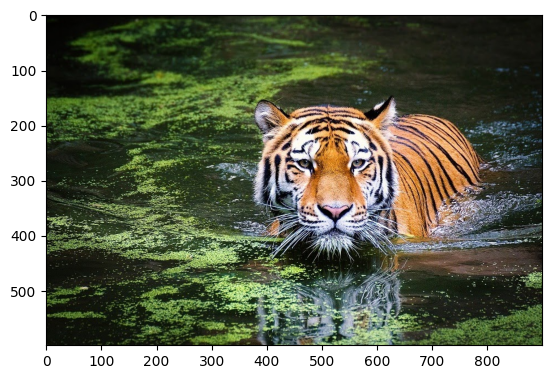

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# img_1 = plt.imread("tiger-jpg.jpg")
# #plt.imshow(img_1)
# #print(img_1)
# img_1_copy = img_1
# print(img_1_copy.flags)
# #img_1_copy.setflags(write = 1)
# print(img_1_copy.flags)
img = np.array(Image.open("tiger-jpg.jpg"))
plt.imshow(img)

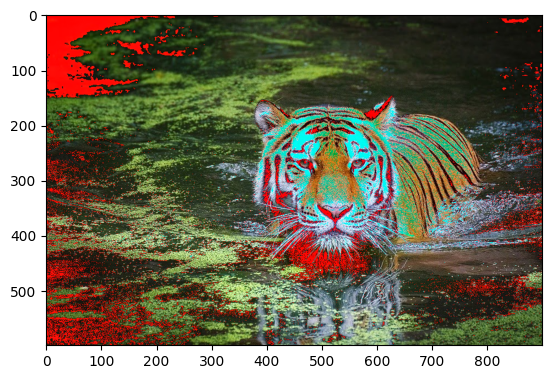

In [2]:
# Red color alteration
for i in range(len(img)):
    for j in range(len(img[i])):
        if img[i][j][0] < 15:
            img[i][j][0] = 255
        elif img[i][j][0] > 235:
            img[i][j][0] = 0

plt.imshow(img)

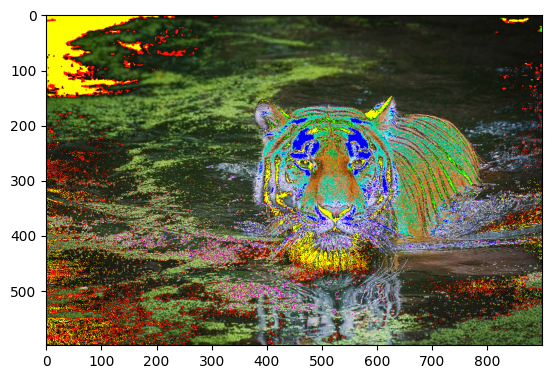

In [3]:
# Green color alteration
for i in range(len(img)):
    for j in range(len(img[i])):
        if img[i][j][1] < 15:
            img[i][j][1] = 255
        elif img[i][j][1] > 235:
            img[i][j][1] = 0

plt.imshow(img)

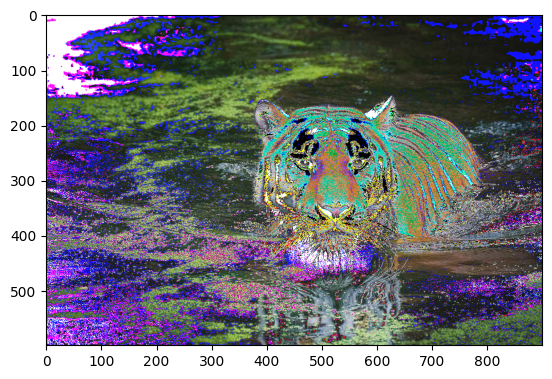

In [4]:
# Blue color alteration
for i in range(len(img)):
    for j in range(len(img[i])):
        if img[i][j][2] < 15:
            img[i][j][2] = 255
        elif img[i][j][2] > 235:
            img[i][j][2] = 0

plt.imshow(img)

Task 2.
Titanic

In [5]:
# Task 2. Titanic dataset
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('train.csv')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Before analysis we load the data set and study the data it has. We know that the dataset has data about 891 passengers. The data is divided in 11 columns:
* PassengerID - identification number of a passeger
* Survived - a boolean value where 1 means that the passenger has survived and 0 that the passenger has died
* Pclass - a categorical variable meaning the class of the ticket: 1 for the 1st, 2 for the second etc.
* Name - names of the passengers
* Sex - male or female
* Age - age in years, fractional if less than 1
* SibSp - a number of siblings/spouses at the board
* Parch - a number of parents or childrens at the board
* Tiket - a ticket number
* Fare - a passenger fare
* Cabin - a cabin number
* Embarked - port of embarkation

Before preliminary analysis three columns are added:
* The column Fam_tot - measure the members of the one family among passengers
* The column Ch_Nanny - split passengers into Adults, Children with Parents ("P") and children with nanny ("N")
* The column Age_Group - split all the passenger into 5 age groups

In [6]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
print(data.info())

data["Fam_tot"] = data["SibSp"] + data["Parch"]
ch_nanny_cond = [(data["Age"] < 18) & (data["Parch"] == 0), (data["Age"] < 18) & (data["Parch"] != 0)]
age_cond = [(data["Age"] < 10), (data["Age"] >= 10) & (data["Age"] < 18), (data["Age"] >= 18) & (data["Age"] < 35),
            (data["Age"] >= 35) & (data["Age"] < 50), (data["Age"] >= 50) &
            (data["Age"] < 65), (data["Age"] >= 65)]
age_val = ["Baby", "Child", "Young adult", "Adult", "Mature", "Old"]


data["Ch_Nanny"] = np.select(ch_nanny_cond, ["N", "P"], default = "Adult")
data["Age_Group"] = np.select(age_cond, age_val, default = "Other")
data[["Family name", "Other name"]] = data["Name"].str.split(",",n = 1, expand = True)
data[["Title", "Other name"]] = data["Other name"].str.split(".",n = 1, expand = True)
data['Title'] = data['Title'].str.replace(' ', '')
data['Other name'] = data['Other name'].str.strip()
data[['Hus_name','Other name']] = data['Other name'].str.split(' ', n = 1, expand = True)

data.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fam_tot,Ch_Nanny,Age_Group,Family name,Other name,Title,Hus_name
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891.000000,891,891,891,576,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,3,6,667,463,17,441
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN,Adult,Young adult,Andersson,Henry,Mr,William
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN,778,543,9,13,517,48
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.904602,NaN,NaN,NaN,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.002015,1.102743,0.806057,NaN,49.693429,NaN,NaN,1.613459,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,29.699118,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


From describe function we can make first conclusions:
- Survival rate is 38.4%
- First class passengers represented less than 25% of total
- Most of the passengers were males - 577 individuals
- Some passengers have the same ticket number - meaning they were travelling together
- Medium age of a passenger is around 30 years with the youngest 6 month and the oldest 80 years old
- Medium fare is 32 with minimum price 0 and the maximum around 512
- Most of the passengers were embarked in port S - 644 individuals
- The greatest family at the board had 11 members
- There were 113 children among travellers

    Pclass     Sex  Survived  count
0        1  female         1     91
1        1  female         0      3
2        1    male         0     77
3        1    male         1     45
4        2  female         1     70
5        2  female         0      6
6        2    male         0     91
7        2    male         1     17
8        3  female         0     72
9        3  female         1     72
10       3    male         0    300
11       3    male         1     47


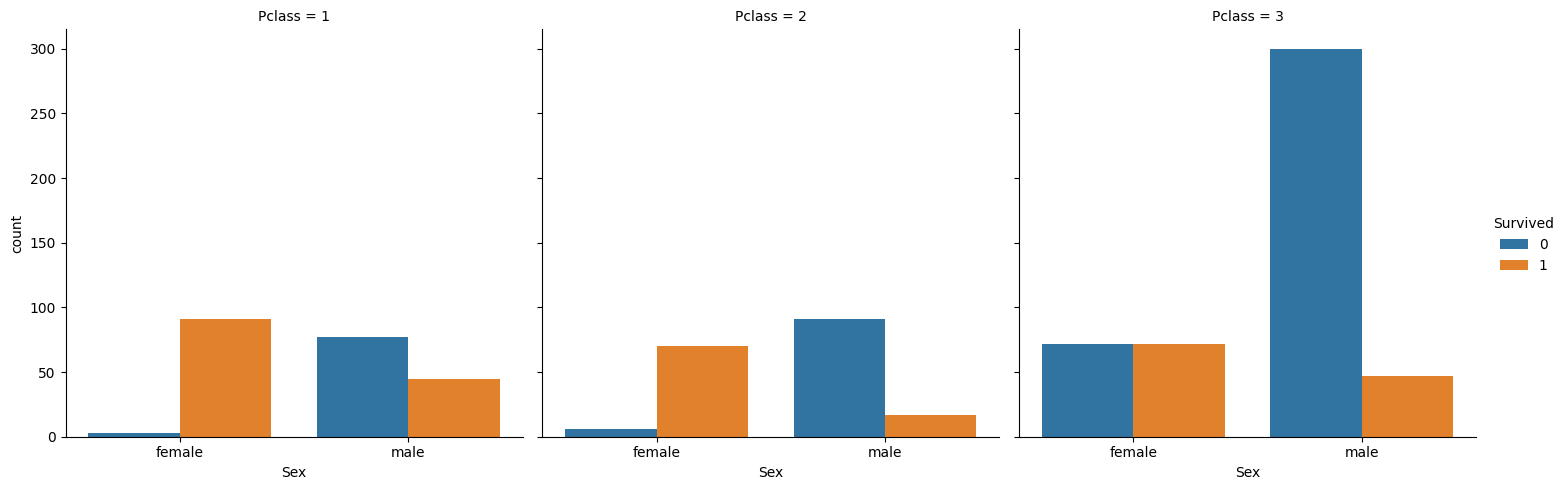

In [7]:
prop_sx_cl = data.groupby(["Pclass", "Sex"])["Survived"].value_counts()
prop_sx_cl = prop_sx_cl.reset_index()
print(prop_sx_cl)
g = sns.catplot(kind = "bar", data = prop_sx_cl, x = "Sex", y = "count", col = "Pclass", hue = "Survived", order = ["female", "male"])

In [8]:
# Now the relationships between independent and dependent variables will be studied
# prop_sx_cl = data[data["Survived"] == 1].groupby("Pclass")["Sex"].value_counts(normalize = True)
# prop_sx_cl = prop_sx_cl.reset_index()
# print(prop_sx_cl)
# g = sns.catplot(kind = "bar", data = prop_sx_cl, x = "Sex", y = "proportion", col = "Pclass", hue = "Sex", palette={'male':'#B11225', 'female':'#062A77'})

<Axes: xlabel='Age_Group'>

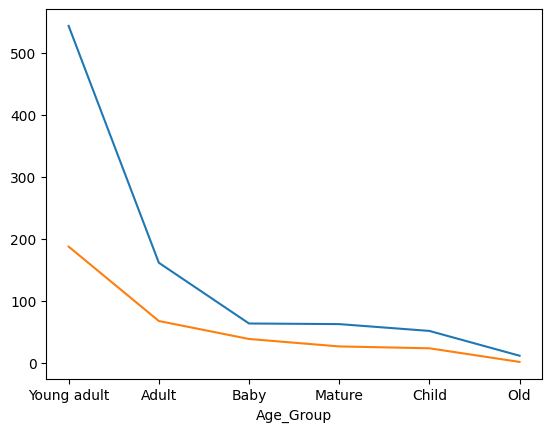

In [9]:
data["Age_Group"].value_counts().plot()
data[data["Survived"] == 1]["Age_Group"].value_counts().plot()


   Pclass  Survived Ch_Nanny  count
0       1         0        P      1
1       1         1        P      8
2       1         1        N      3
3       2         0        N      2
4       2         1        P     18
5       2         1        N      3
6       3         0        P     35
7       3         0        N     14
8       3         1        P     19
9       3         1        N     10


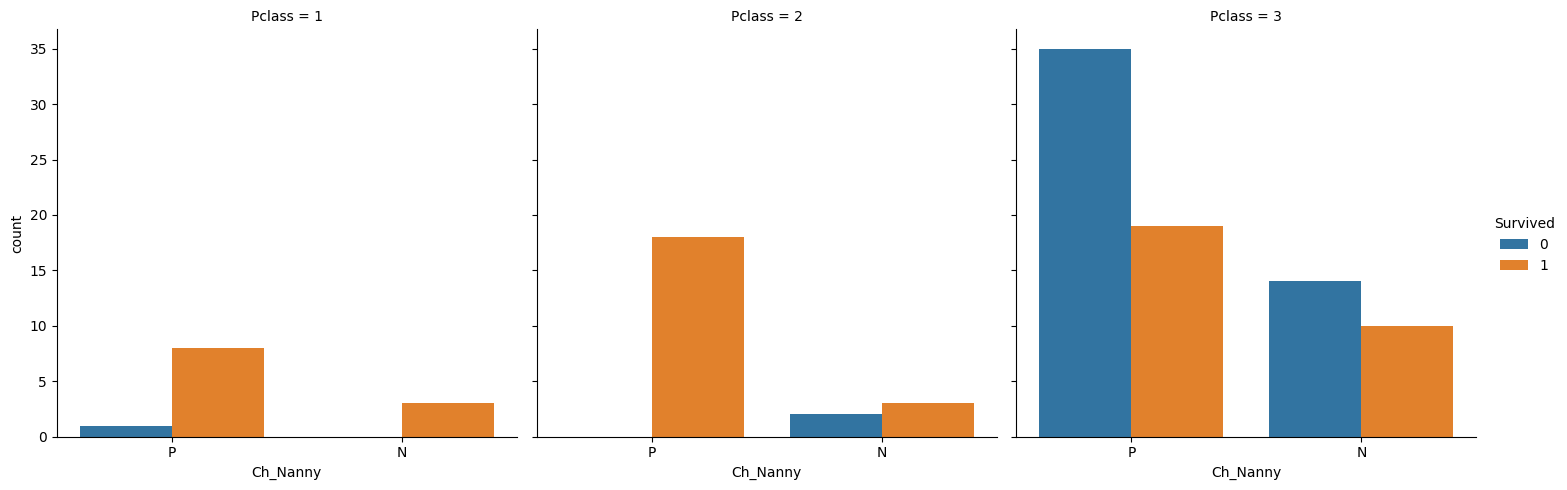

In [10]:
prop_ch_cl = data[data["Ch_Nanny"] != "Adult"].groupby(["Pclass", "Survived"])["Ch_Nanny"].value_counts()
prop_ch_cl = prop_ch_cl.reset_index()
print(prop_ch_cl)
g = sns.catplot(kind = "bar", data = prop_ch_cl, x = "Ch_Nanny", y = "count", col = "Pclass", hue = "Survived")

In [11]:
# prop_ch_cl = data[(data["Survived"] == 1) & (data["Ch_Nanny"] != "Adult")].groupby("Pclass")["Ch_Nanny"].value_counts(normalize = True)
# prop_ch_cl = prop_ch_cl.reset_index()
# print(prop_ch_cl)
# g = sns.catplot(kind = "bar", data = prop_ch_cl, x = "Ch_Nanny", y = "proportion", col = "Pclass", hue = "Ch_Nanny")

<Axes: xlabel='Embarked'>

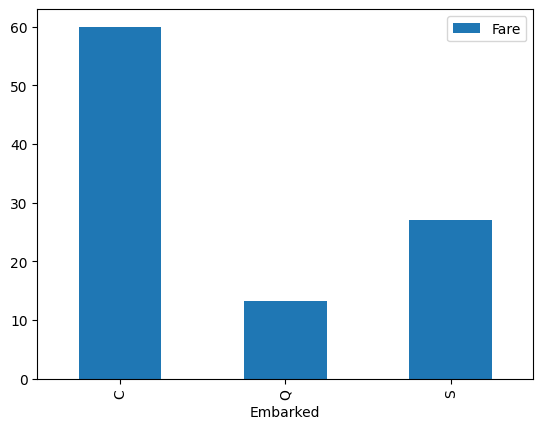

In [12]:
data[["Embarked", "Fare"]].groupby("Embarked").mean().plot(kind="bar")

In [13]:
sib = data.iloc[:, [3, 4, 5, 6, 8, 10, 11, 15, 16, 17, 18]]
sib = sib.sort_values(by = ["Family name", "Age"])
#sib_grp_size = sib[(sib["SibSp"] > 0) & (sib["Age"] < 18)].groupby("Family name").size().reset_index(name = "Sib_ch")
#sib_grp = sib_grp[sib_grp[]]
sib

,Name,Sex,Age,SibSp,Ticket,Cabin,Embarked,Family name,Other name,Title,Hus_name
845,"Abbing, Mr. Anthony",male,42.000000,0,C.A. 5547,NaN,S,Abbing,None,Mr,Anthony
746,"Abbott, Mr. Rossmore Edward",male,16.000000,1,C.A. 2673,NaN,S,Abbott,Edward,Mr,Rossmore
279,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.000000,1,C.A. 2673,NaN,S,Abbott,(Rosa Hunt),Mrs,Stanton
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.000000,1,P/PP 3381,NaN,C,Abelson,(Hannah Wizosky),Mrs,Samuel
308,"Abelson, Mr. Samuel",male,30.000000,1,P/PP 3381,NaN,C,Abelson,None,Mr,Samuel
...,...,...,...,...,...,...,...,...,...,...,...
286,"de Mulder, Mr. Theodore",male,30.000000,0,345774,NaN,S,de Mulder,None,Mr,Theodore
282,"de Pelsmaeker, Mr. Alfons",male,16.000000,0,345778,NaN,S,de Pelsmaeker,None,Mr,Alfons
361,"del Carlo, Mr. Sebastiano",male,29.000000,1,SC/PARIS 2167,NaN,C,del Carlo,None,Mr,Sebastiano
153,"van Billiard, Mr. Austin Blyler",male,40.500000,0,A/5. 851,NaN,S,van Billiard,Blyler,Mr,Austin


In [30]:
sib['Who_is'] = 0
sib['SibSp_count'] = 0

couples = ['Mr', 'Mrs', 'Master', 'Dr', 'the Countess', 'Sir', 'Lady', 'Mme', 'Don']
spouses = sib[(sib['SibSp'] > 0) & (sib['Age'] >= 18) & (sib['Title'].isin(couples))].sort_values(['Family name', 'Hus_name']).reset_index()


for i in range(len(spouses) - 2):
    if (spouses.iloc[i]['Family name'] == spouses.iloc[i + 1]['Family name']) & (spouses.iloc[i]['Sex'] != spouses.iloc[i + 1]['Sex']) & (spouses.iloc[i]['Ticket'] == spouses.iloc[i + 1]['Ticket']) & (spouses.iloc[i]['Embarked'] == spouses.iloc[i + 1]['Embarked']):
        spouses.at[i, 'Who_is'] = 'Spouse of ' + str(spouses.loc[i+1]['index'])
        spouses.at[i, 'SibSp_count'] = 1
        spouses.at[i + 1, 'Who_is'] = 'Spouse of ' + str(spouses.loc[i]['index'])
        spouses.at[i + 1, 'SibSp_count'] = 1
    elif (spouses.iloc[i]['Cabin'] == spouses.iloc[i + 1]['Cabin']):
        spouses.at[i, 'Who_is'] = 'Spouse of ' + str(spouses.loc[i+1]['index'])
        spouses.at[i, 'SibSp_count'] = 1
        spouses.at[i + 1, 'Who_is'] = 'Spouse of ' + str(spouses.loc[i]['index'])
        spouses.at[i + 1, 'SibSp_count'] = 1


print(spouses.head(20))

spouse_num = spouses.iloc[:]['SibSp_count'].sum() / 2
spouse_num

# & (sposes.iloc[i, [2]] != sposes.iloc[i + 1, [2]]) & (sposes.iloc[i, [5]] == sposes.iloc[i + 1, [5]]) & (sposes.iloc[i, [7]] == sposes.iloc[i + 1, [7]])

    index                                               Name     Sex   Age  \
0     279                   Abbott, Mrs. Stanton (Rosa Hunt)  female  35.0   
1     874              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0   
2     308                                Abelson, Mr. Samuel    male  30.0   
3      40     Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  female  40.0   
4     498    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0   
5      13                        Andersson, Mr. Anders Johan    male  39.0   
6     610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0   
7     518  Angle, Mrs. William A (Florence "Mary" Agnes H...  female  36.0   
8     571      Appleton, Mrs. Edward Dale (Charlotte Lamson)  female  53.0   
9      49      Arnold-Franchi, Mrs. Josef (Josefine Franchi)  female  18.0   
10    353                          Arnold-Franchi, Mr. Josef    male  25.0   
11     25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  fe

41.0

In [29]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

abs meaning, find couples